# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install seaborn
# %pip install plotly
# %pip install sklearn
# %pip install statsmodels
# %pip install xgboost

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import statsmodels.formula.api as smf

import plotly.graph_objects as go

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv')
df_raw = pd.read_csv('../data/raw/titanic_train.csv')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_raw.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5000,T,S


In [6]:
df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 1- Borramos las columnas que no son explicativas de de 'Survived'
df_transform=df_raw.drop(['Cabin','PassengerId', 'Ticket', 'Name'], axis=1)

In [8]:
# Sacamos los valores NaN
df_transform['Embarked_clean']=df_transform['Embarked'].fillna('S')

In [9]:
df_transform['Embarked_clean']=df_transform['Embarked'].fillna('S')

In [10]:
#sustituyo por el promedio de age
df_transform['Age_clean']=df_transform['Age'].fillna(30)

In [11]:
# Trnsformamos las variables categóricas
df_raw['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
df_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df_transform['Sex_encoded']=df_transform['Sex'].apply(lambda x: 1 if x == 'female' else 0 )

In [14]:
df_transform['Embarked_S']=df_transform['Embarked_clean'].apply(lambda x: 1 if x == 'S' else 0 )

In [15]:
df_transform['Embarked_C']=df_transform['Embarked_clean'].apply(lambda x: 1 if x == 'C' else 0 )

In [16]:
df=df_transform.copy()

Eliminamos las columnas ya transformadas y hacemos split

In [17]:
X=df.drop(['Survived','Embarked', 'Sex', 'Embarked_clean', 'Age' ], axis=1)

In [18]:
y=df['Survived']

In [19]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=70)

Histogramas

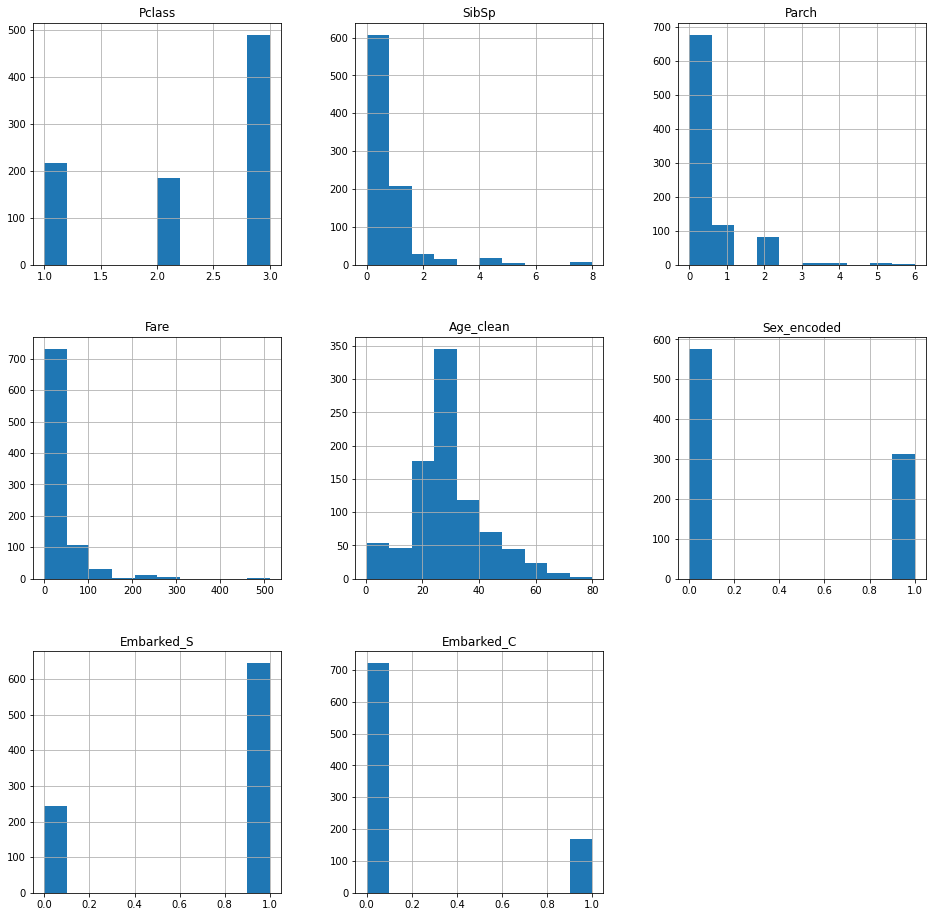

In [20]:
X.hist(figsize=(16,16))
plt.show()

- Las variables de conteo SibSp y Parch no presentan distribucion normal, al igual que las varaiables categoricas codificadas.
- A 'Fare' le podria aplicar la transformacion log para normalizar pero como este algoritmo no exigue una dist normal, se decide no hacerlo

In [21]:
# Boxplot

#import plotly.graph_objects as go

for i in X:
    fig = go.Figure()
    fig.add_trace(go.Box(x=X[i], name=""))


    fig.update_layout({
        'xaxis': {
            'title_text': "",
        },
        'yaxis': {
            'title_text': i,
        },
        })
    fig.update_traces(orientation='h') # horizontal box plots
                    
    fig.show()

Outliers no los sacamos porque el algoritmo de random forest es robusto con outliers

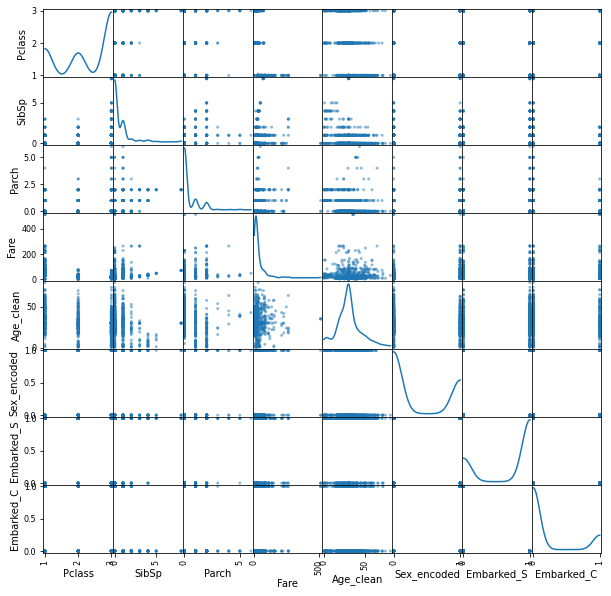

In [23]:
# Scatter Matrix

pd.plotting.scatter_matrix(X, diagonal='kde', figsize=(10,10))
plt.show()

In [24]:
X.corr()

,Pclass,SibSp,Parch,Fare,Age_clean,Sex_encoded,Embarked_S,Embarked_C
Pclass,1.000000,0.083081,0.018443,-0.549500,-0.329727,-0.131900,0.074053,-0.243292
SibSp,0.083081,1.000000,0.414838,0.159651,-0.232440,0.114631,0.068734,-0.059528
Parch,0.018443,0.414838,1.000000,0.216225,-0.180330,0.245489,0.060814,-0.011069
Fare,-0.549500,0.159651,0.216225,1.000000,0.090632,0.182333,-0.162184,0.269335
Age_clean,-0.329727,-0.232440,-0.180330,0.090632,1.000000,-0.084660,-0.021566,0.032330
Sex_encoded,-0.131900,0.114631,0.245489,0.182333,-0.084660,1.000000,-0.119224,0.082853
Embarked_S,0.074053,0.068734,0.060814,-0.162184,-0.021566,-0.119224,1.000000,-0.782742
Embarked_C,-0.243292,-0.059528,-0.011069,0.269335,0.032330,0.082853,-0.782742,1.000000


- Ninguna de las correlaciones supera el 0.8, por lo q decido no eliminar ninguna variable por colinealidad
- En caso de tener dos variables q correlacionen significativamente elimnaria la que mas correlacione con el resto de las variables

In [27]:
# Modelo Random Forest

classifier=RandomForestClassifier(random_state=1107)

In [28]:
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=1107)

In [29]:
y_pred=classifier.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       131
           1       0.82      0.68      0.75        92

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.80       223



Nos da accuracy del 81%, el modelo de random forest predice la supervivencia

In [32]:
# 1 - Investigamos hiperparametros para mejorar modelo (Randomized search CV)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Criterio
criterion=['gini','entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
#'max_features': max_features, # Son muy pocas variables por lo cual no vale la pena aplicarlo
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap,
'criterion':criterion}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']}


In [35]:
classif_grid=RandomForestClassifier(random_state=1107)
classif_grid_random=RandomizedSearchCV(estimator=classif_grid,n_iter=100,cv=5,random_state=1107,param_distributions=random_grid)

In [36]:
classif_grid_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1107),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1107)

In [37]:
# Mejor árbol
classif_grid_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [38]:
y_pred=classif_grid_random.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       131
           1       0.90      0.71      0.79        92

    accuracy                           0.85       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.85      0.85      0.84       223



Mejoramos el accuracy de 0.81 a 0.85 con la optimizacion de hiperparametros

In [40]:
#save model to disk
final_model = '../models/final_model.sav'
pickle.dump =(classif_grid_random, open(final_model, 'wb'))

Boosting algorithms: XGBoost

In [43]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
# Predictions
y_xgb_pred = xgb.predict(X_test)

In [45]:
print('Accuracy of xgboost in test set:',accuracy_score(y_test, y_xgb_pred))

Accuracy of xgboost in test set: 0.7937219730941704


In [46]:
xgb_2 = XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid_xgb = RandomizedSearchCV(xgb_2,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=4,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'eta': [0.05, 0.1, 0.15, 0.2, 0.25,
                                                0.3],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='neg_log_loss')

In [47]:
xgb_2 = grid_xgb.best_estimator_

In [48]:
y_pred_xgb_2 = xgb_2.predict(X_test)

In [49]:
print('Accuracy of xgboost with hyperparameters selected by random grid search in test set:',accuracy_score(y_test, y_pred_xgb_2))

Accuracy of xgboost with hyperparameters selected by random grid search in test set: 0.8430493273542601


El accuracy del modelo xgboost con hiperparametros seleccionados por Grid Search CV es similar al modelo obtenido al modelo random forest sin optimizacion de hiperparametros, pero es menor al modelo obtenido con random forest con optimizacion de hiperparametros Random search CV.

Grid Search CV: tries with all the possible combinations

Randomized search CV: In this case, not all parameters values are tried out. This allows us to include more hyperparameters in the grid

n_iter: number of parameter settings that are sampled

In [50]:
#save model to disk
final_model_2 = '../models/final_model_2.sav'
pickle.dump =(xgb_2, open(final_model_2, 'wb'))